In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

usedu_df = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

1. Determine all the variable types and find the fraction of the missing values for each variable.

In [78]:
usedu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [79]:
usedu_df.isnull()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [80]:
usedu_df.isnull().sum()/usedu_df.isnull().count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.176273
TOTAL_REVENUE                   0.142091
FEDERAL_REVENUE                 0.142091
STATE_REVENUE                   0.142091
LOCAL_REVENUE                   0.142091
TOTAL_EXPENDITURE               0.142091
INSTRUCTION_EXPENDITURE         0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
OTHER_EXPENDITURE               0.176273
CAPITAL_OUTLAY_EXPENDITURE      0.142091
GRADES_PK_G                     0.115952
GRADES_KG_G                     0.088472
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_9_12_G                   0.087802
GRADES_ALL_G                    0.115952
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

In [15]:
# replacing missing values with a central value like mean. It might be good for all, and any can be tossed.
usedu_df2 = usedu_df.copy()

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G", "AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", 
             "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]


for col in fill_list:
    usedu_df2.loc[:, col] = usedu_df2.loc[:, col].fillna(usedu_df2.loc[:, col].mean())
 
print(usedu_df2.isnull().sum()/usedu_df2.isnull().count())

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64


3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [83]:
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#fill_list = usedu_df.select_dtypes(include=numerics)
#years = usedu_df['YEAR'].unique()
#print (usedu_df.isnull().sum()/len(usedu_df)) * 100
#for year in years:
# usedu_df.fillna({x: usedu_df.loc[usedu_df["YEAR"] == year][x].mean() for x in fill_list}, inplace = True)
#print (usedu_df.isnull().sum()/len(usedu_df)) * 100

In [8]:
usedu_df3 = usedu_df.copy()

fill_list = usedu_df.select_dtypes(include=['float64'])
for year in years:
 usedu_df3.fillna({x: usedu_df3.loc[usedu_df3["YEAR"] == year][x].mean() for x in fill_list}, inplace = True)
print (usedu_df3.isnull().sum()/usedu_df3.isnull().count())

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64


4. This time, fill in the missing values using interpolation (extrapolation).

In [12]:
usedu_df4 = usedu_df.copy()

for col in fill_list:
    usedu_df4.loc[:, col] = usedu_df4.loc[:, col].interpolate()
    
print(usedu_df4.isnull().sum()/usedu_df4.isnull().count())

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.024129
TOTAL_REVENUE                   0.000000
FEDERAL_REVENUE                 0.000000
STATE_REVENUE                   0.000000
LOCAL_REVENUE                   0.000000
TOTAL_EXPENDITURE               0.000000
INSTRUCTION_EXPENDITURE         0.000000
SUPPORT_SERVICES_EXPENDITURE    0.000000
OTHER_EXPENDITURE               0.024129
CAPITAL_OUTLAY_EXPENDITURE      0.000000
GRADES_PK_G                     0.000000
GRADES_KG_G                     0.000000
GRADES_4_G                      0.000000
GRADES_8_G                      0.000000
GRADES_12_G                     0.000000
GRADES_1_8_G                    0.000000
GRADES_9_12_G                   0.000000
GRADES_ALL_G                    0.000000
AVG_MATH_4_SCORE                0.000000
AVG_MATH_8_SCORE                0.000000
AVG_READING_4_SCORE             0.000000
AVG_READING_8_SC

5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [13]:
for col in fill_list:
    print("{} Statistics: ".format(col))
    print(pd.concat([usedu_df[col], usedu_df2[col],
                     usedu_df3[col], usedu_df4[col]], axis=1).describe())

ENROLL Statistics: 
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.492000e+03  1.456000e+03
mean   9.159308e+05  9.159308e+05  9.159952e+05  1.005984e+06
std    1.065280e+06  9.667725e+05  9.667726e+05  1.009158e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  3.150940e+05  2.973995e+05
50%    6.483130e+05  8.204140e+05  8.204140e+05  7.540845e+05
75%    1.014528e+06  9.211780e+05  9.211780e+05  1.595024e+06
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
TOTAL_REVENUE Statistics: 
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.492000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   8.449927e+06   1.111164e+07
std     1.174519e+07   1.087818e+07   1.099210e+07   1.200155e+07
min     4.656500e+05   4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.546261e+06   2.546261e+06   2.546261e+06

max    3.929869e+06  3.929869e+06  3.929869e+06  3.929869e+06
GRADES_9_12_G Statistics: 
       GRADES_9_12_G  GRADES_9_12_G  GRADES_9_12_G  GRADES_9_12_G
count   1.361000e+03   1.492000e+03   1.492000e+03   1.492000e+03
mean    2.470714e+05   2.470714e+05   2.436403e+05   2.286678e+05
std     3.077056e+05   2.938773e+05   2.940855e+05   3.005815e+05
min     1.808000e+03   1.808000e+03   1.808000e+03   1.808000e+03
25%     5.147100e+04   5.919750e+04   5.919750e+04   3.950675e+04
50%     1.642600e+05   1.817010e+05   1.817010e+05   1.472355e+05
75%     2.905020e+05   2.825390e+05   2.825390e+05   2.843505e+05
max     2.013687e+06   2.013687e+06   2.013687e+06   2.013687e+06
GRADES_ALL_G Statistics: 
       GRADES_ALL_G  GRADES_ALL_G  GRADES_ALL_G  GRADES_ALL_G
count  1.319000e+03  1.492000e+03  1.492000e+03  1.492000e+03
mean   8.024415e+05  8.024415e+05  7.936632e+05  7.478782e+05
std    9.707031e+05  9.126522e+05  9.129742e+05  9.291585e+05
min    7.254000e+03  7.254000e+03  7.254000

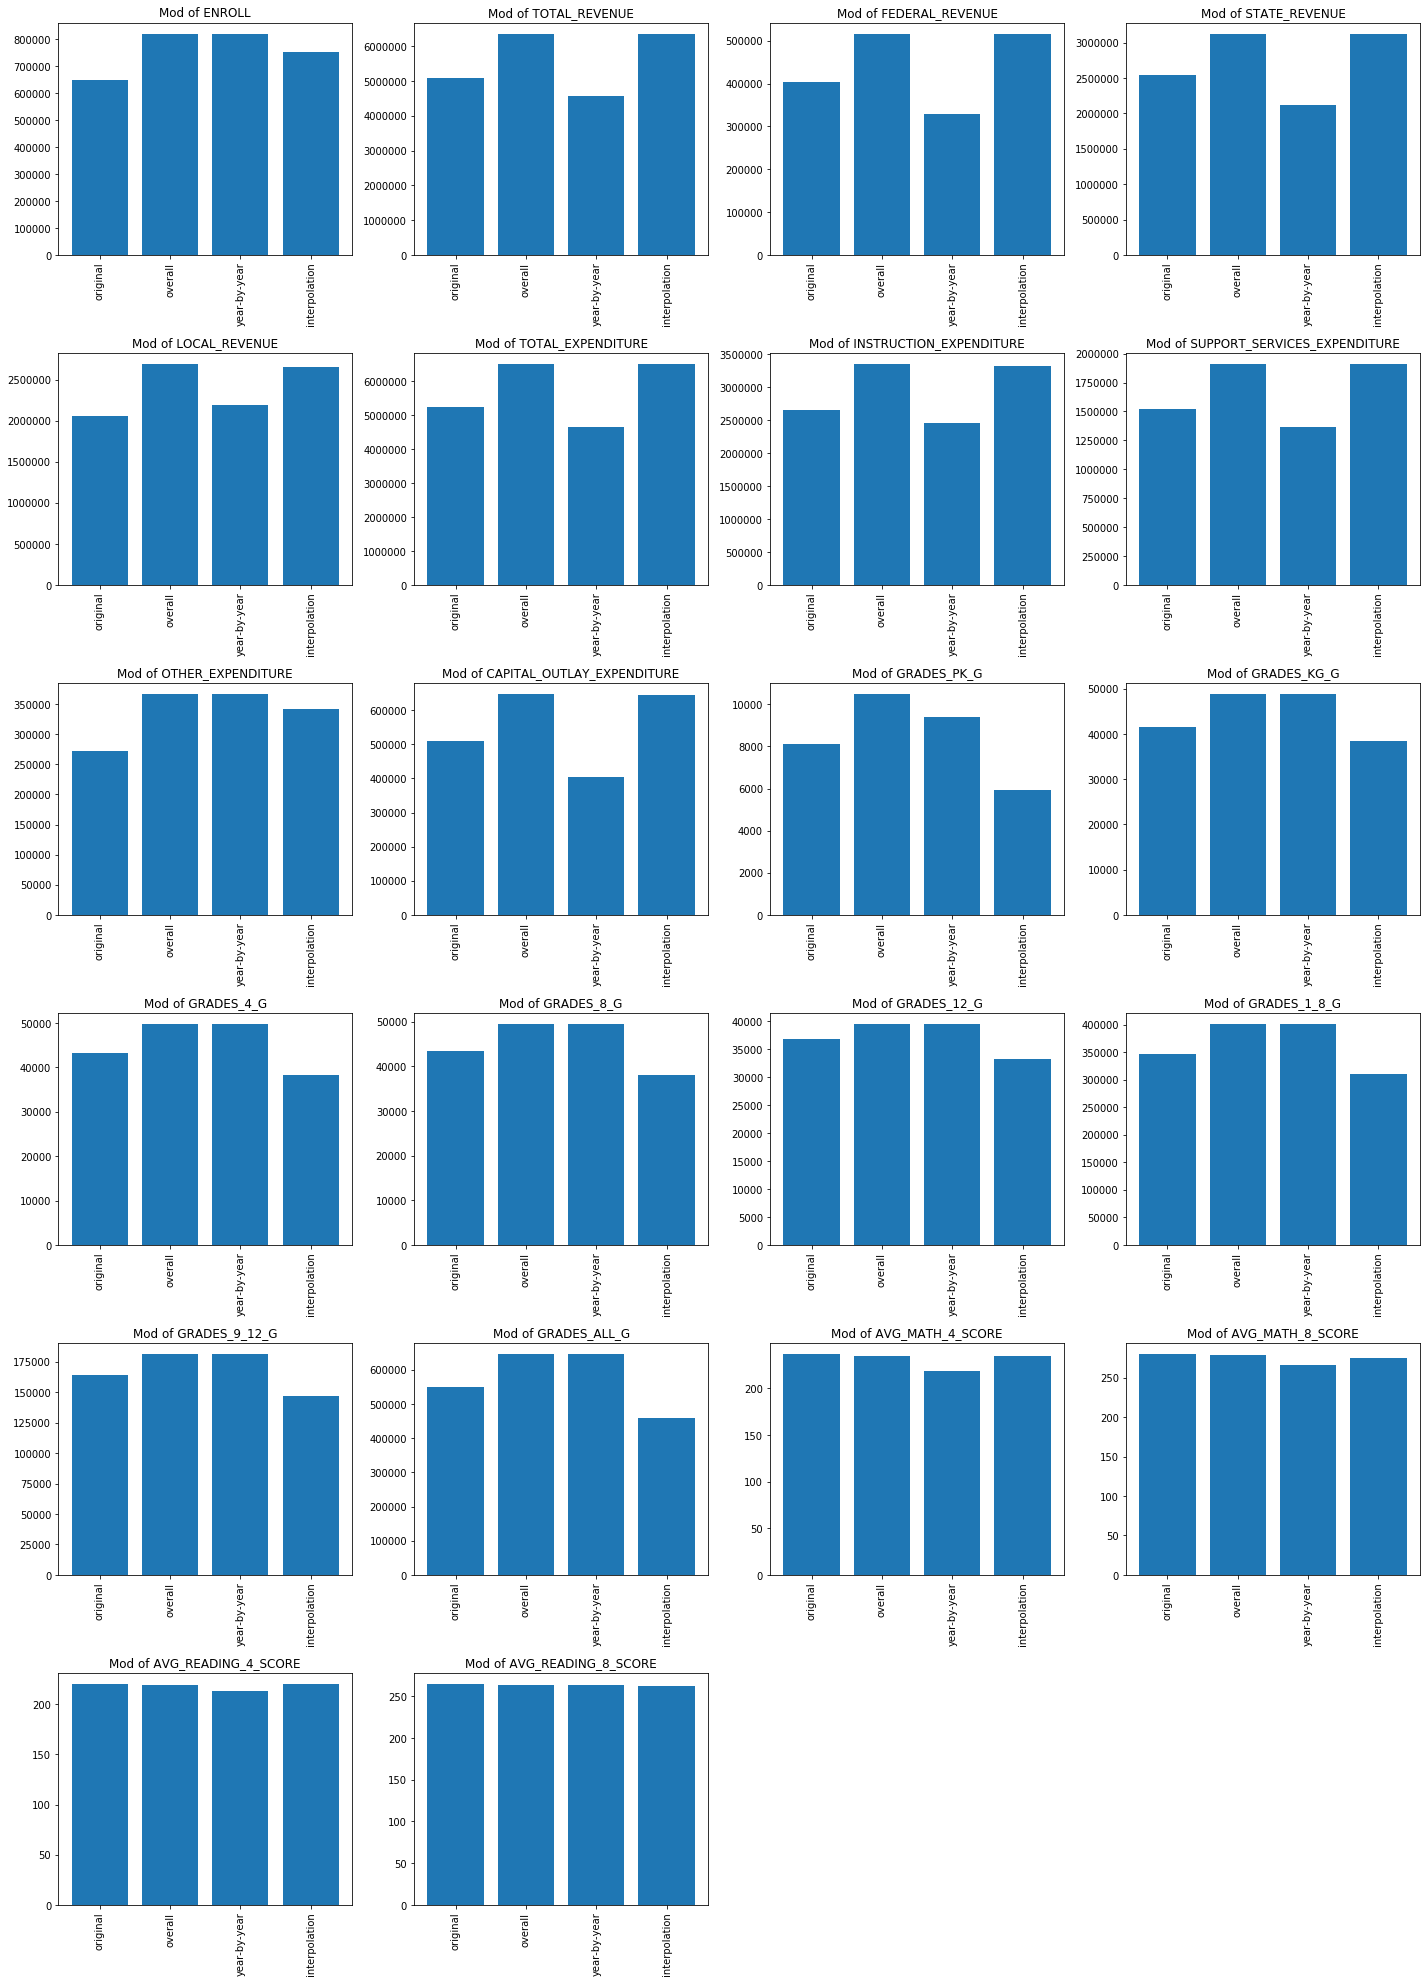

In [14]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = pd.concat([usedu_df[col], usedu_df2[col],
                     usedu_df3[col], usedu_df4[col]], axis=1)
    
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()
plt.show()